In [96]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [97]:
btc=pd.read_csv('btc.csv')

In [98]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [99]:
df = btc.reset_index()[['Date','Closing Price (USD)']].rename({'Date':'ds','Closing Price (USD)':'y'}, axis=1)


df['ds']=range(1,len(df['ds'])+1)
df.tail()

,ds,y
2656,2657,36346.609502
2657,2658,36577.519646
2658,2659,35004.532627
2659,2660,30606.182676
2660,2661,33368.365932


In [100]:


df['SMA_3'] = df.iloc[:,1].rolling(window=3).mean()
df['SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

df.head()

,ds,y,SMA_3,SMA_4
0,1,123.65499,NaN,NaN
1,2,125.45500,NaN,NaN
2,3,108.58483,119.231607,NaN
3,4,118.67466,117.571497,119.092370
4,5,121.33866,116.199383,118.513288


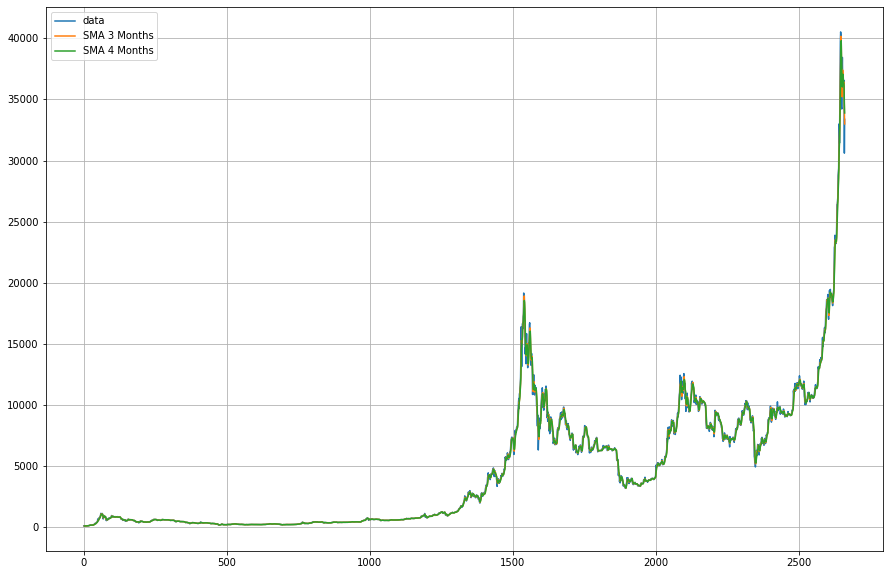

In [101]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['y'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [102]:
btc=pd.read_csv('btc.csv')

df = btc.reset_index()[['Date','Closing Price (USD)']].rename({'Date':'ds','Closing Price (USD)':'y'}, axis=1)

df['CMA_4'] = df.expanding(min_periods=2).mean()
df.head(10)


,ds,y,CMA_4
0,2013-10-01,123.65499,NaN
1,2013-10-02,125.45500,124.554995
2,2013-10-03,108.58483,119.231607
3,2013-10-04,118.67466,119.092370
4,2013-10-05,121.33866,119.541628
5,2013-10-06,120.65533,119.727245
6,2013-10-07,121.79500,120.022639
7,2013-10-08,123.03300,120.398934
8,2013-10-09,124.04900,120.804497
9,2013-10-10,125.96116,121.320163


In [103]:
df.tail()

,ds,y,CMA_4
2656,2021-01-19,36346.609502,4542.999483
2657,2021-01-20,36577.519646,4555.051597
2658,2021-01-21,35004.532627,4566.503076
2659,2021-01-22,30606.182676,4576.292429
2660,2021-01-23,33368.365932,4587.112449


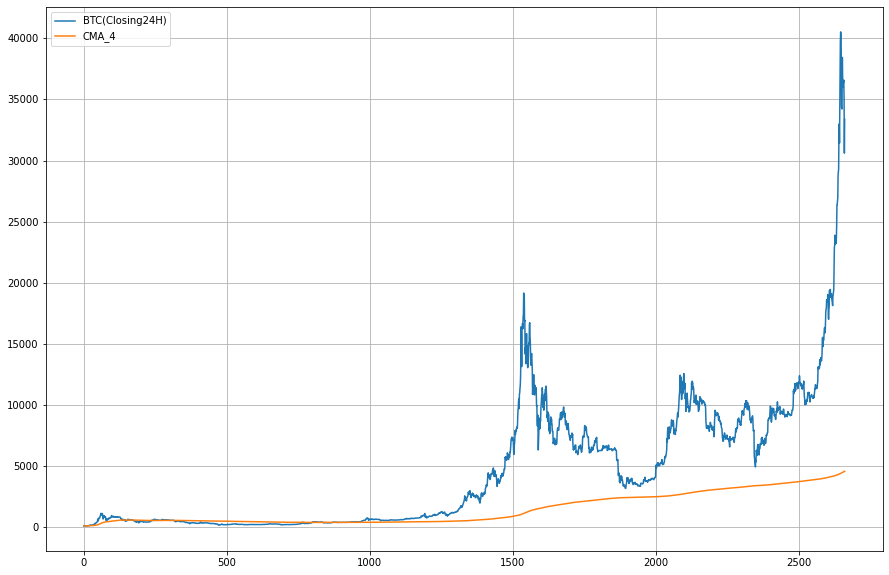

In [104]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['y'],label='BTC(Closing24H)')
plt.plot(df['CMA_4'],label='CMA_4')
plt.legend(loc=2)

In [105]:
df['EMA'] = df.iloc[:,1].ewm(span=40,adjust=False).mean()
df.tail()

,ds,y,CMA_4,EMA
2656,2021-01-19,36346.609502,4542.999483,30348.663886
2657,2021-01-20,36577.519646,4555.051597,30652.510509
2658,2021-01-21,35004.532627,4566.503076,30864.804270
2659,2021-01-22,30606.182676,4576.292429,30852.188583
2660,2021-01-23,33368.365932,4587.112449,30974.928941


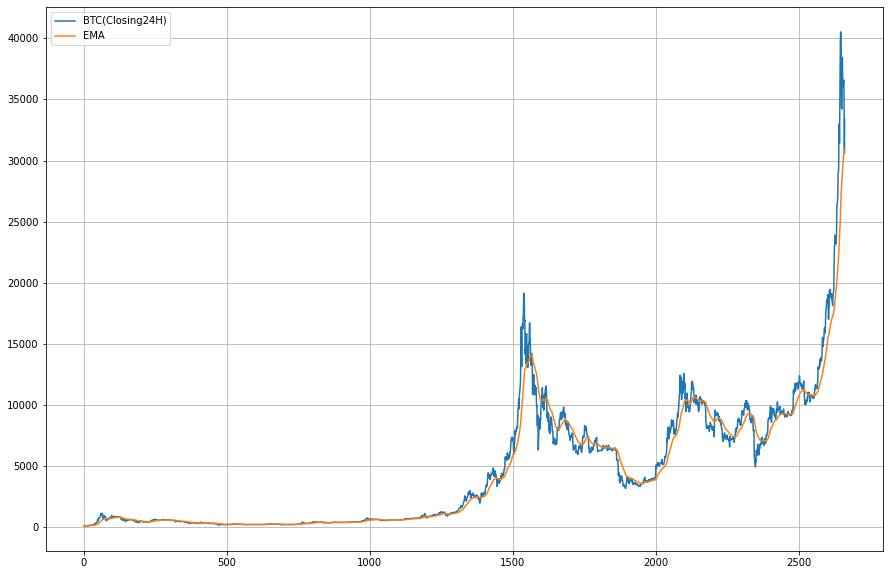

In [119]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['y'],label='BTC(Closing24H)')
plt.plot(df['EMA'],label='EMA')
plt.legend(loc=2)

In [179]:
pred_period=365
btc=pd.read_csv('btc.csv')
df2 = btc.reset_index()[['Date','Closing Price (USD)']].rename({'Date':'ds','Closing Price (USD)':'y'}, axis=1)

df2=pd.DataFrame(df2['y'])
df2['EMA'] = df2.iloc[:].ewm(span=40,adjust=False).mean()
df2
dfx=pd.DataFrame(df2['y'])
dfy=pd.DataFrame(df2['EMA'])
dfy=dfy.reset_index()[['EMA']].rename({'EMA':'y'}, axis=1)
dfx=dfx.append(pd.DataFrame(dfy.iloc[-5:]),ignore_index=True)
dfx['EMA'] = dfx.iloc[:].ewm(span=40,adjust=False).mean()
display(dfx)
for i in range(int(pred_period/5)):
    dfy=pd.DataFrame(dfx['EMA'])
    dfx=pd.DataFrame(dfx['y'])

    dfy=dfy.reset_index()[['EMA']].rename({'EMA':'y'}, axis=1)
    dfx=dfx.append(pd.DataFrame(dfy.iloc[-5:]),ignore_index=True)
    dfx['EMA'] = dfx.iloc[:].ewm(span=40,adjust=False).mean()
        
    
dfx.tail()

,y,EMA
0,123.654990,123.654990
1,125.455000,123.742795
2,108.584830,123.003382
3,118.674660,122.792225
4,121.338660,122.721320
...,...,...
2661,30348.663886,30944.379426
2662,30652.510509,30930.141918
2663,30864.804270,30926.954716
2664,30852.188583,30923.307587


,y,EMA
3026,30926.702471,30926.702471
3027,30926.702471,30926.702471
3028,30926.702471,30926.702471
3029,30926.702471,30926.702471
3030,30926.702471,30926.702471


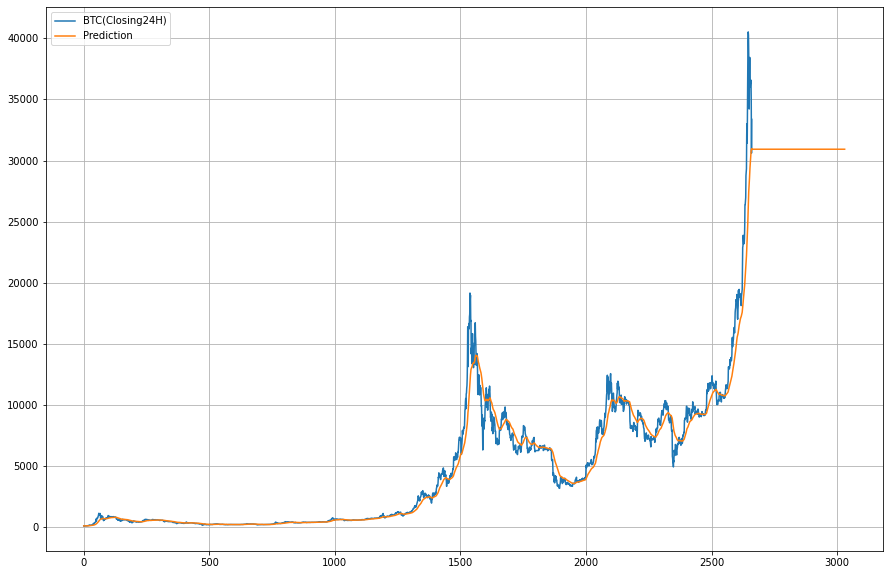

In [177]:

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['y'],label='BTC(Closing24H)')
plt.plot(dfx['EMA'],label='Prediction')
plt.legend(loc=2)